In [ ]:
import pandas as pd

In [ ]:
paysim=pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")

In [ ]:
paysim

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:

paysim.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
paysim.size

69988820

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Pivot table
paysim_pivot1=pd.pivot_table(paysim,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum], margins=True)

In [ ]:
#Adding color gradient
cm = sns.light_palette("green", as_cmap=True)
paysim_pivot1.style.background_gradient(cmap=cm)

In [ ]:
#Pivot table
paysim_pivot2=pd.pivot_table(paysim,index=["type"],
                               values=['amount','oldbalanceOrg','newbalanceOrig'],
                               aggfunc=[np.sum], margins=True)
#Adding style
paysim_pivot2.style\


In [ ]:
#Pivot table
paysim_pivot3=pd.pivot_table(paysim,index=["type"],
                               values=['amount','oldbalanceDest','newbalanceDest'],
                               aggfunc=[np.sum], margins=True)
paysim_pivot3.style\

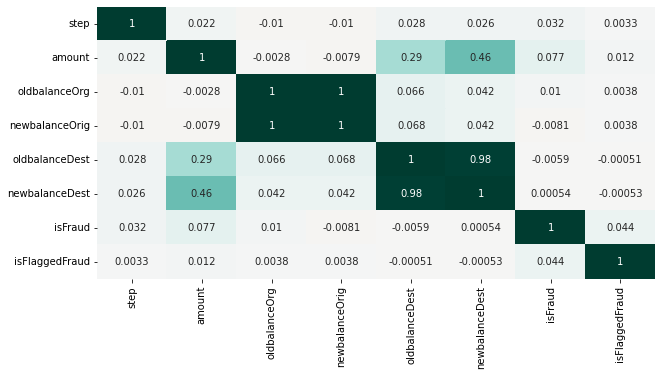

In [ ]:
corr_matrix=paysim.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True,cbar=False)

In [ ]:
paysim=paysim.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis=1)

In [ ]:
paysim

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [ ]:
#Distribution of Amount
ax=paysim["amount"]

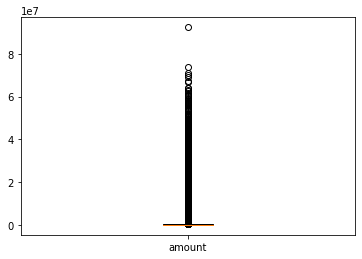

In [ ]:

box_plot_data=[ax]
plt.boxplot(box_plot_data,patch_artist=True,labels=['amount'])
plt.show()

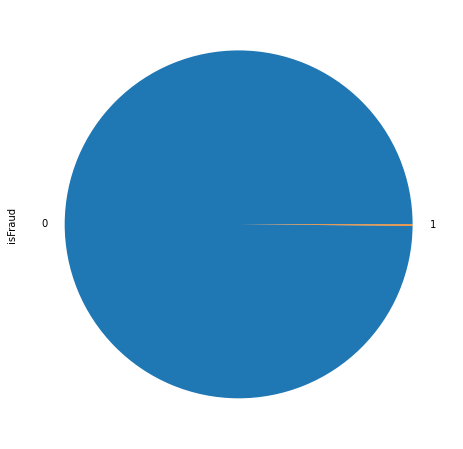

In [ ]:
top_10 = paysim['isFraud'].value_counts()[:10]
top_10.plot(kind='pie',figsize=(10,8))

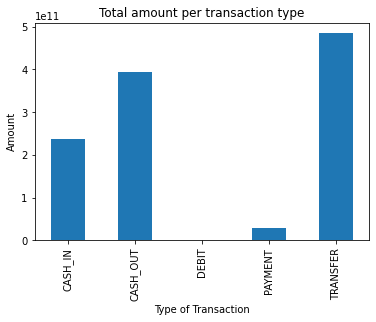

In [ ]:
var = paysim.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [ ]:
paysim=paysim.loc[(paysim["type"].isin(["TRANSFER","CASH_OUT"]))]
paysim.head(50)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0
19,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0
24,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0
42,CASH_OUT,110414.71,26845.41,0.00,288800.00,2415.16,0
47,CASH_OUT,56953.90,1942.02,0.00,70253.00,64106.18,0
48,CASH_OUT,5346.89,0.00,0.00,652637.00,6453430.91,0
51,CASH_OUT,23261.30,20411.53,0.00,25742.00,0.00,0
58,TRANSFER,62610.80,79114.00,16503.20,517.00,8383.29,0


In [ ]:
paysim=paysim.drop(['type'],axis=1)
paysim

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.00,0.0,0.00,0.00,1
3,181.00,181.00,0.0,21182.00,0.00,1
15,229133.94,15325.00,0.0,5083.00,51513.44,0
19,215310.30,705.00,0.0,22425.00,0.00,0
24,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.0,0.00,0.00,1


In [ ]:
minority_class_len=len(paysim[paysim["isFraud"]==1])
print(minority_class_len)

8213


In [ ]:
majority_class_indices=paysim[paysim["isFraud"]==0].index
print(majority_class_indices)

Int64Index([     15,      19,      24,      42,      47,      48,      51,
                 58,      60,      70,
            ...
            6362268, 6362276, 6362296, 6362304, 6362306, 6362313, 6362317,
            6362320, 6362321, 6362322],
           dtype='int64', length=2762196)


In [ ]:
random_majority_indeces=np.random.choice(majority_class_indices,minority_class_len,replace=False)

In [ ]:
minority_class_indeces=paysim[paysim["isFraud"]==1].index
print(minority_class_indeces)

Int64Index([      2,       3,     251,     252,     680,     681,     724,
                969,     970,    1115,
            ...
            6362610, 6362611, 6362612, 6362613, 6362614, 6362615, 6362616,
            6362617, 6362618, 6362619],
           dtype='int64', length=8213)


In [ ]:
under_sample_indeces=np.concatenate([minority_class_indeces,random_majority_indeces])

In [ ]:
paysim=paysim.loc[under_sample_indeces]

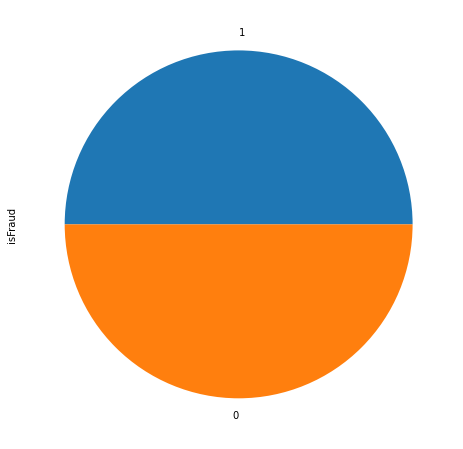

In [ ]:
top_10 = paysim['isFraud'].value_counts()[:10]
top_10.plot(kind='pie',figsize=(10,8))

In [ ]:
paysim

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
251,2806.00,2806.00,0.00,0.00,0.00,1
252,2806.00,2806.00,0.00,26202.00,0.00,1
680,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...
1747930,144847.73,514265.45,369417.71,0.00,144847.73,0
1290001,83446.76,40476.00,0.00,14639.69,98086.45,0
3245777,288733.53,0.00,0.00,930554.32,1219287.85,0
1871989,216037.64,0.00,0.00,5706049.65,5910396.84,0


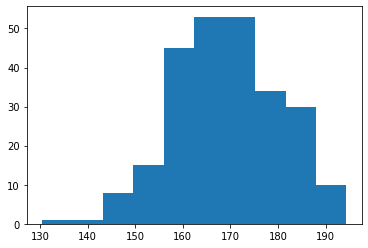

In [ ]:
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [ ]:
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

paysim.amount         = ss.fit_transform(paysim[['amount']])
paysim.oldbalanceOrg  = ss.fit_transform(paysim[['oldbalanceOrg']])
paysim.oldbalanceDest = ss.fit_transform(paysim[['oldbalanceDest']])
paysim.newbalanceOrig = ss.fit_transform(paysim[['newbalanceOrig']])
paysim.newbalanceDest = ss.fit_transform(paysim[['newbalanceDest']])

In [ ]:
svc_cv=SVC(random_state=0 )
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=0)
dt_cv=DecisionTreeClassifier(random_state=0)
logreg_cv = LogisticRegression(random_state=0)
cv_dict = {0:'SVC',1:'Naive Bayes',2:'rf_cv',3:'dt_cv',4:'logreg_cv'}
cv_models=[svc_cv,nb_cv,rf_cv,dt_cv,logreg_cv]
for i,model in enumerate(cv_models):
   print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

SVC Test Accuracy: 0.8967275494672755
Naive Bayes Test Accuracy: 0.723820395738204
rf_cv Test Accuracy: 0.9885083713850836
dt_cv Test Accuracy: 0.9879756468797565
logreg_cv Test Accuracy: 0.9240487062404871


In [ ]:
pipeline1=Pipeline([('scalar1',StandardScaler()),
                   ('lr_classifier',LogisticRegression (random_state=0))])

In [ ]:
pipeline2=Pipeline([('scalar2',StandardScaler()),
                   ('Rc_classifier',RandomForestClassifier (random_state=0))])

In [ ]:
pipeline3=Pipeline([('scalar3',StandardScaler()),
                   ('SCM_classifier',SVC (random_state=0))])

In [ ]:
pipeline4=Pipeline([('scalar4',StandardScaler()),
                   ('Gass_classifier',GaussianNB ())])


In [ ]:
pipeline5=Pipeline([('scalar5',StandardScaler()),
                   ('Des_classifier',DecisionTreeClassifier (random_state=0))])

In [ ]:
pipelines=[pipeline1,pipeline2,pipeline3,pipeline4,pipeline5]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
pipe_dict={0:"LogisticRegression", 2:"RandomForestClassifier", 3:"SVC", 4:"GaussianNB", 5:"DecisionTreeClassifier"}

In [ ]:
#fit the pipelines
for pipe in pipelines:
  pipe.fit(X_train,y_train)

In [ ]:
for i, model in enumerate(pipelines):
   print("{} Test Accuracy: {}".format(pipe_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

LogisticRegression Test Accuracy: 0.8746575342465753


KeyError: ignored

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

paysim.amount         = ss.fit_transform(paysim[['amount']])
paysim.oldbalanceOrg  = ss.fit_transform(paysim[['oldbalanceOrg']])
paysim.oldbalanceDest = ss.fit_transform(paysim[['oldbalanceDest']])
paysim.newbalanceOrig = ss.fit_transform(paysim[['newbalanceOrig']])
paysim.newbalanceDest = ss.fit_transform(paysim[['newbalanceDest']])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
#from sklearn_model_selection import cross_val_score
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)
classifier = GaussianNB()
Kfold_validation=KFold(10)

#classifier.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(classifier,X,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.4059647  0.42057212 0.44430919 0.46256847 0.43396226 0.97321972
 0.98294762 0.96711328 0.97990256 0.97563946]
0.7046199393136497


In [ ]:
#classifier.score(X_train,y_train)

In [ ]:
#pred = classifier.predict(X_test)

In [ ]:
#accuracy_score(y_test, pred)

In [ ]:
#print(confusion_matrix(y_test,pred))

In [ ]:
#.from_estimator(classifier, X_test, y_test)
#plt.grid(False)


In [ ]:
#print(classification_report(y_test,pred))

In [ ]:
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)

from sklearn.svm import SVC
from sklearn.model_selection import KFold
modal=SVC()
Kfold_validation=KFold(10)


In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(modal,X,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.69141814 0.75897748 0.78271455 0.77358491 0.75897748 0.86062082
 0.85505481 0.88367844 0.86845311 0.8727162 ]
0.8106195923650551


In [ ]:
modal.score(X_train,y_train)

0.9160578386605784

In [ ]:
pred = modal.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.9230066950699939

In [ ]:
print(confusion_matrix(y_test,pred))

[[1622   53]
 [ 200 1411]]


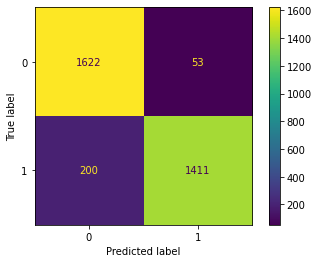

In [ ]:
ConfusionMatrixDisplay.from_estimator(modal, X_test, y_test)
plt.grid(False)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1675
           1       0.96      0.88      0.92      1611

    accuracy                           0.92      3286
   macro avg       0.93      0.92      0.92      3286
weighted avg       0.93      0.92      0.92      3286



In [ ]:
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
classifiers= RandomForestClassifier(n_estimators= 10, criterion="entropy")
Kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(classifiers,X,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.96469872 0.99087036 0.99695679 0.99695679 0.99330493 0.98052343
 0.98477467 0.9908648  0.98112058 0.98355664]
0.9863627703400466


In [ ]:
classifier.score(X_train,y_train)

0.9993911719939117

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.9887401095556908

In [ ]:
print(confusion_matrix(y_test,pred))

[[1627   20]
 [  17 1622]]


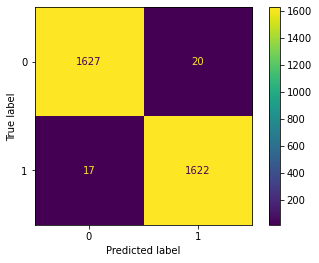

In [ ]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.grid(False)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1647
           1       0.99      0.99      0.99      1639

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [ ]:
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)

from sklearn.linear_model import LogisticRegression
classifierss= LogisticRegression()
from sklearn.model_selection import KFold
Kfold_validation=KFold(10)


In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(classifierss,X,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.70724285 0.76871576 0.77906269 0.78332319 0.74802191 0.92818016
 0.93300853 0.93422655 0.93057247 0.92021924]
0.843257335775812


In [ ]:
classifier.score(X_train,y_train)

0.8726788432267885

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8727936701156421

In [ ]:
print(confusion_matrix(y_test,pred))

[[1568   90]
 [ 328 1300]]


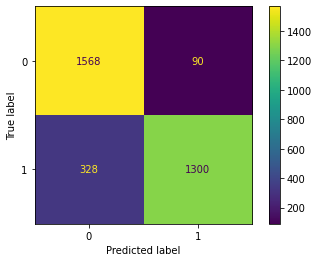

In [ ]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.grid(False)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1658
           1       0.94      0.80      0.86      1628

    accuracy                           0.87      3286
   macro avg       0.88      0.87      0.87      3286
weighted avg       0.88      0.87      0.87      3286



In [ ]:
y = paysim.isFraud
X = paysim.drop(['isFraud'], axis=1)

from sklearn.tree import DecisionTreeClassifier
classifiersss= DecisionTreeClassifier(criterion='entropy', random_state=0)
from sklearn.model_selection import KFold
Kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(classifiersss,X,y,cv=Kfold_validation)
print(results)
print(np.mean(results))

[0.97748022 0.98782715 0.99452222 0.99391357 0.99452222 0.98539257
 0.99025579 0.99330085 0.98599269 0.98660171]
0.9889808978110362


In [ ]:
pred = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.9884357881923311

In [ ]:
print(confusion_matrix(y_test,pred))

[[1600   26]
 [  12 1648]]


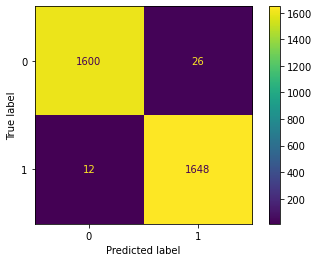

In [ ]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.grid(False)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1626
           1       0.98      0.99      0.99      1660

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

